# COVID-19 in India

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style

# Read CSV File

In [2]:
df_india=pd.read_csv('covid_19_india.csv')

In [3]:
df_india

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30-01-2020,6:00 PM,Kerala,1,0,0,0,1
1,31-01-2020,6:00 PM,Kerala,1,0,0,0,1
2,01-02-2020,6:00 PM,Kerala,2,0,0,0,2
3,02-02-2020,6:00 PM,Kerala,3,0,0,0,3
4,03-02-2020,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...
18105,11-08-2021,8:00 AM,Telangana,-,-,638410,3831,650353
18106,11-08-2021,8:00 AM,Tripura,-,-,77811,773,80660
18107,11-08-2021,8:00 AM,Uttarakhand,-,-,334650,7368,342462
18108,11-08-2021,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812


# Inspect The Data Frame

In [4]:
print(df_india.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      18110 non-null  object
 1   Time                      18110 non-null  object
 2   State/UnionTerritory      18110 non-null  object
 3   ConfirmedIndianNational   18110 non-null  object
 4   ConfirmedForeignNational  18110 non-null  object
 5   Cured                     18110 non-null  int64 
 6   Deaths                    18110 non-null  int64 
 7   Confirmed                 18110 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.1+ MB
None


# Inspect NULL Values in Each Column

In [5]:
df_india.isnull().sum()

Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

# Inspect NULL Values in Each Row

In [6]:
df_india.isnull().sum(axis=1).sort_values(ascending=False)

0        0
12070    0
12076    0
12075    0
12074    0
        ..
6043     0
6044     0
6045     0
6046     0
18109    0
Length: 18110, dtype: int64

# Data Cleaning

In [7]:
df_india.drop(['Time','ConfirmedIndianNational','ConfirmedForeignNational'], axis = 1, inplace = True)

In [8]:
df_india

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,30-01-2020,Kerala,0,0,1
1,31-01-2020,Kerala,0,0,1
2,01-02-2020,Kerala,0,0,2
3,02-02-2020,Kerala,0,0,3
4,03-02-2020,Kerala,0,0,3
...,...,...,...,...,...
18105,11-08-2021,Telangana,638410,3831,650353
18106,11-08-2021,Tripura,77811,773,80660
18107,11-08-2021,Uttarakhand,334650,7368,342462
18108,11-08-2021,Uttar Pradesh,1685492,22775,1708812


In [9]:
states=df_india['State/UnionTerritory'].unique()
states.sort()
for i in states:
    print(i)

Andaman and Nicobar Islands
Andhra Pradesh
Arunachal Pradesh
Assam
Bihar
Bihar****
Cases being reassigned to states
Chandigarh
Chhattisgarh
Dadra and Nagar Haveli
Dadra and Nagar Haveli and Daman and Diu
Daman & Diu
Delhi
Goa
Gujarat
Haryana
Himachal Pradesh
Himanchal Pradesh
Jammu and Kashmir
Jharkhand
Karanataka
Karnataka
Kerala
Ladakh
Lakshadweep
Madhya Pradesh
Madhya Pradesh***
Maharashtra
Maharashtra***
Manipur
Meghalaya
Mizoram
Nagaland
Odisha
Puducherry
Punjab
Rajasthan
Sikkim
Tamil Nadu
Telangana
Telengana
Tripura
Unassigned
Uttar Pradesh
Uttarakhand
West Bengal


In [10]:
MadhyaPradesh=df_india[df_india['State/UnionTerritory']=='Maharashtra***']
print(MadhyaPradesh)

             Date State/UnionTerritory    Cured  Deaths  Confirmed
17338  21-07-2021       Maharashtra***  6000911  130753    6229596


In [11]:
MadhyaPradesh=df_india[df_india['Date']=='21-07-2021']
print(MadhyaPradesh)

             Date                      State/UnionTerritory    Cured  Deaths  \
17318  21-07-2021               Andaman and Nicobar Islands     7370     129   
17319  21-07-2021                            Andhra Pradesh  1907201   13178   
17320  21-07-2021                         Arunachal Pradesh    39269     203   
17321  21-07-2021                                     Assam   528252    5029   
17322  21-07-2021                                     Bihar   713815    9632   
17323  21-07-2021                                Chandigarh    61056     809   
17324  21-07-2021                              Chhattisgarh   983520   13504   
17325  21-07-2021  Dadra and Nagar Haveli and Daman and Diu    10581       4   
17326  21-07-2021                                     Delhi  1410005   25035   
17327  21-07-2021                                       Goa   165449    3113   
17328  21-07-2021                                   Gujarat   814059   10076   
17329  21-07-2021                       

In [12]:
df_india.drop(df_india.index[df_india['State/UnionTerritory'] == 'Unassigned'], inplace = True)
df_india.drop(df_india.index[df_india['State/UnionTerritory'] == 'Cases being reassigned to states'], inplace = True)
df_india.drop(df_india.index[df_india['State/UnionTerritory'] == 'Dadra and Nagar Haveli and Daman and Diu'], inplace = True)

In [13]:
df_india['State/UnionTerritory'] = df_india['State/UnionTerritory'].replace(['Madhya Pradesh***'],'Madhya Pradesh')
df_india['State/UnionTerritory'] = df_india['State/UnionTerritory'].replace(['Maharashtra***'],'Maharashtra')
df_india['State/UnionTerritory'] = df_india['State/UnionTerritory'].replace(['Bihar****'],'Bihar')
df_india['State/UnionTerritory'] = df_india['State/UnionTerritory'].replace(['Telangana'],'Telengana')
df_india['State/UnionTerritory'] = df_india['State/UnionTerritory'].replace(['Karanataka'],'Karnataka')
df_india['State/UnionTerritory'] = df_india['State/UnionTerritory'].replace(['Himanchal Pradesh'],'Himachal Pradesh')    

In [14]:
states=df_india['State/UnionTerritory'].unique()
states.sort()
for i in states:
    print(i)

Andaman and Nicobar Islands
Andhra Pradesh
Arunachal Pradesh
Assam
Bihar
Chandigarh
Chhattisgarh
Dadra and Nagar Haveli
Daman & Diu
Delhi
Goa
Gujarat
Haryana
Himachal Pradesh
Jammu and Kashmir
Jharkhand
Karnataka
Kerala
Ladakh
Lakshadweep
Madhya Pradesh
Maharashtra
Manipur
Meghalaya
Mizoram
Nagaland
Odisha
Puducherry
Punjab
Rajasthan
Sikkim
Tamil Nadu
Telengana
Tripura
Uttar Pradesh
Uttarakhand
West Bengal


In [15]:
MadhyaPradesh=df_india[df_india['State/UnionTerritory']=='Madhya Pradesh']
print(MadhyaPradesh.head())

           Date State/UnionTerritory  Cured  Deaths  Confirmed
256  21-03-2020       Madhya Pradesh      0       0          4
279  22-03-2020       Madhya Pradesh      0       0          4
302  23-03-2020       Madhya Pradesh      0       0          6
325  24-03-2020       Madhya Pradesh      0       0          7
349  25-03-2020       Madhya Pradesh      0       0         14


In [16]:
data=df_india.values
print(data[254:260])

[['21-03-2020' 'Karnataka' 1 1 15]
 ['21-03-2020' 'Kerala' 3 0 40]
 ['21-03-2020' 'Madhya Pradesh' 0 0 4]
 ['21-03-2020' 'Maharashtra' 0 1 63]
 ['21-03-2020' 'Odisha' 0 0 2]
 ['21-03-2020' 'Puducherry' 0 0 1]]


# Creating Column "Active Cases"

In [17]:
active_cases=[]
for i in range(len(data)):
    active_cases.append(data[i][4]-(data[i][2]+data[i][3]))

In [18]:
df_india['Active Cases'] = active_cases

In [19]:
df_india

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active Cases
0,30-01-2020,Kerala,0,0,1,1
1,31-01-2020,Kerala,0,0,1,1
2,01-02-2020,Kerala,0,0,2,2
3,02-02-2020,Kerala,0,0,3,3
4,03-02-2020,Kerala,0,0,3,3
...,...,...,...,...,...,...
18105,11-08-2021,Telengana,638410,3831,650353,8112
18106,11-08-2021,Tripura,77811,773,80660,2076
18107,11-08-2021,Uttarakhand,334650,7368,342462,444
18108,11-08-2021,Uttar Pradesh,1685492,22775,1708812,545


# Top 5 States having Most Number of Total Cases

In [20]:
data=df_india.values
total_lst=[]
for states in df_india['State/UnionTerritory'].unique():
    total_cases=0
    for i in range(len(data)):
        if(data[i][1]==states):
            total_cases=data[i][4]
    total_lst.append([states, total_cases])

             State  Total Cases
9      Maharashtra      6363442
0           Kerala      3586693
8        Karnataka      2921049
7       Tamil Nadu      2579130
12  Andhra Pradesh      1985182
AxesSubplot(0.125,0.125;0.775x0.755)


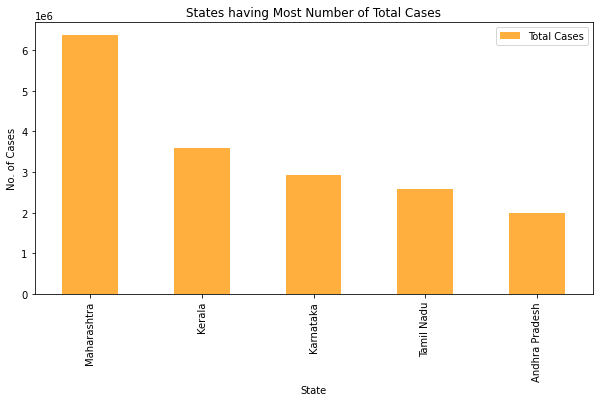

In [21]:
total_states_df=pd.DataFrame(total_lst,columns=['State','Total Cases']).sort_values(by='Total Cases',ascending=False).head()
print(total_states_df)
print(total_states_df.plot(x='State',y='Total Cases',kind='bar',figsize=(10,5),title='States having Most Number of Total Cases',ylabel='No. of Cases',color='#FFAF3D'))

# Top 5 States having Least Number of Total Cases

                          State  Total Cases
34                  Daman & Diu            2
25  Andaman and Nicobar Islands         7548
35                  Lakshadweep        10263
36       Dadra and Nagar Haveli        10377
6                        Ladakh        20411
AxesSubplot(0.125,0.125;0.775x0.755)


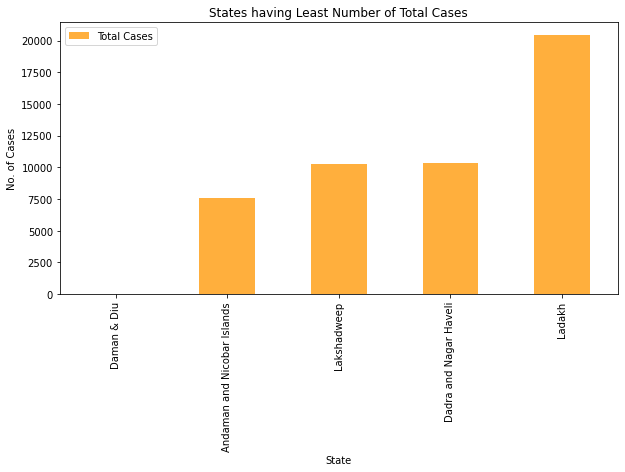

In [22]:
least_total_cases=pd.DataFrame(total_lst,columns=['State','Total Cases']).sort_values(by='Total Cases',ascending=True).head(5)
print(least_total_cases)
print(least_total_cases.plot(x='State',y='Total Cases',kind='bar',figsize=(10,5),title='States having Least Number of Total Cases',ylabel='No. of Cases',color='#FFAF3D'))

# Top 5 States having Most Number of Active Cases

In [23]:
data=df_india.values
active_lst=[]
for states in df_india['State/UnionTerritory'].unique():
    active_cases=0
    for i in range(len(data)):
        if(data[i][1]==states):
            active_cases=data[i][5]
    active_lst.append([states, active_cases])

             State  Active Cases
0           Kerala        172505
9      Maharashtra         69565
8        Karnataka         22702
7       Tamil Nadu         20363
12  Andhra Pradesh         18882


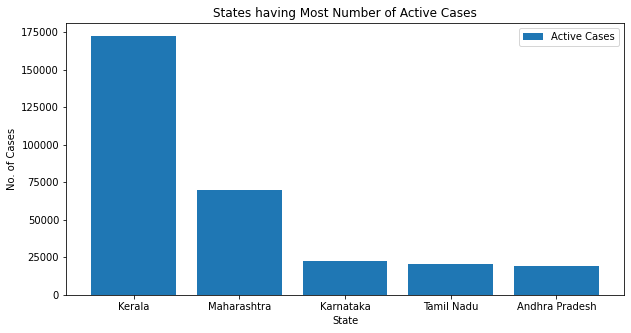

In [24]:
active_cases_df=pd.DataFrame(active_lst,columns=['State','Active Cases']).sort_values(by='Active Cases',ascending=False).head(5)
print(active_cases_df)
plt.figure(figsize=(10,5))
plt.bar(active_cases_df['State'],active_cases_df['Active Cases'])
plt.legend(["Active Cases"])
plt.title("States having Most Number of Active Cases")
plt.xlabel("State")
plt.ylabel("No. of Cases")
plt.show()

# Trend of Active Cases in India

In [25]:
data=df_india.values
active_lst=[]
for dates in df_india['Date'].unique():
    active_cases=0
    for i in range(len(data)):
        if(data[i][0]==dates):
            active_cases+=data[i][5]
    active_lst.append([dates, active_cases])

In [26]:
active_lst[0:6]

[['30-01-2020', 1],
 ['31-01-2020', 1],
 ['01-02-2020', 2],
 ['02-02-2020', 3],
 ['03-02-2020', 3],
 ['04-02-2020', 3]]

<AxesSubplot:title={'center':'Active Cases Trend'}, xlabel='Date', ylabel='No. of Active Cases'>

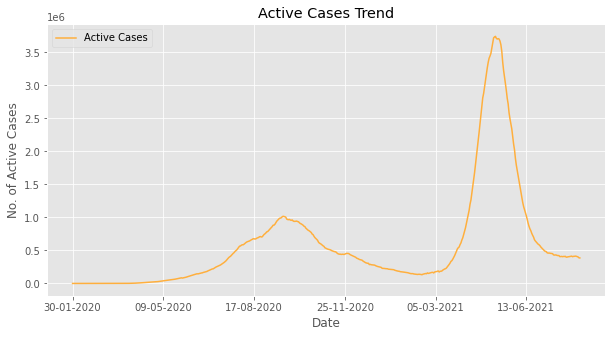

In [27]:
plt.style.use('ggplot')
pd.DataFrame(active_lst,columns=['Date','Active Cases']).plot(x='Date',y='Active Cases',title='Active Cases Trend',figsize=(10,5),ylabel='No. of Active Cases',color='#FFAF3D')

# Top 5 States having Minimum Number of Deaths

In [28]:
data=df_india.values
death_lst=[]
for states in df_india['State/UnionTerritory'].unique():
    death_cases=0
    for i in range(len(data)):
        if(data[i][1]==states):
            death_cases=data[i][3]
    death_lst.append([states, death_cases])

                          State  Deaths
34                  Daman & Diu       0
36       Dadra and Nagar Haveli       4
35                  Lakshadweep      51
25  Andaman and Nicobar Islands     129
24                      Mizoram     171


<AxesSubplot:title={'center':'States having Least Number of Deaths'}, xlabel='State', ylabel='No. of Deaths'>

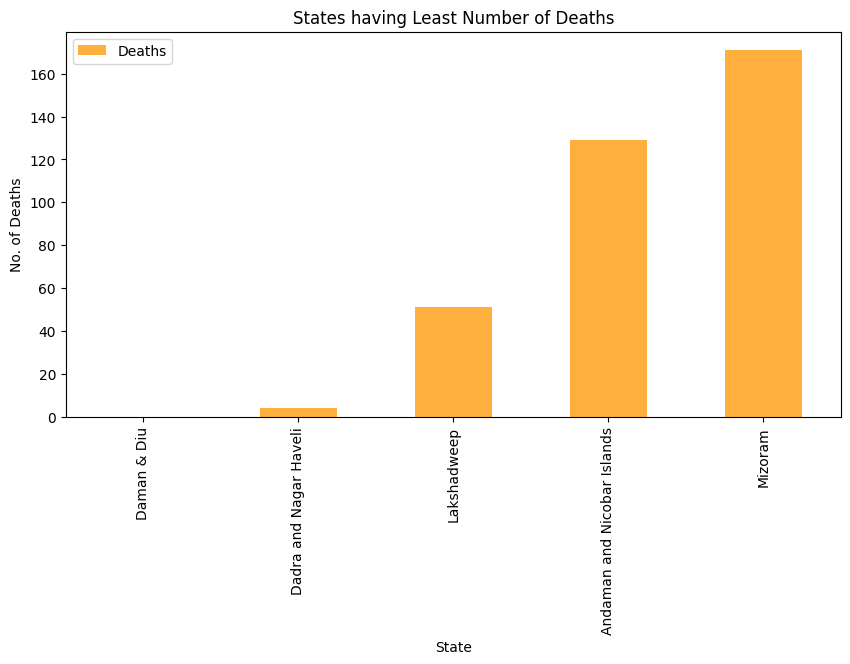

In [29]:
plt.style.use('default')
death_df=pd.DataFrame(death_lst,columns=['State','Deaths']).sort_values(by='Deaths',ascending=True).head(5)
print(death_df)
death_df.plot(x='State',y='Deaths',kind='bar',figsize=(10,5),title='States having Least Number of Deaths',ylabel='No. of Deaths',color='#FFAF3D')

# Trend of Total Cases in Maharashtra

In [30]:
df_maharashtra=df_india[df_india['State/UnionTerritory']=='Maharashtra']
df_maharashtra.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active Cases
76,09-03-2020,Maharashtra,0,0,2,2
91,10-03-2020,Maharashtra,0,0,5,5
97,11-03-2020,Maharashtra,0,0,2,2
120,12-03-2020,Maharashtra,0,0,11,11
133,13-03-2020,Maharashtra,0,0,14,14


In [31]:
data=df_maharashtra.values
total_maha_lst=[]
total_maha_cases=0
for i in range(len(data)):
    total_maha_lst.append([data[i][0], data[i][4]])

In [32]:
total_maha_lst[0:6]

[['09-03-2020', 2],
 ['10-03-2020', 5],
 ['11-03-2020', 2],
 ['12-03-2020', 11],
 ['13-03-2020', 14],
 ['14-03-2020', 14]]

<AxesSubplot:title={'center':'Maharashtra Total Cases Trend'}, xlabel='Date', ylabel='No. of Cases'>

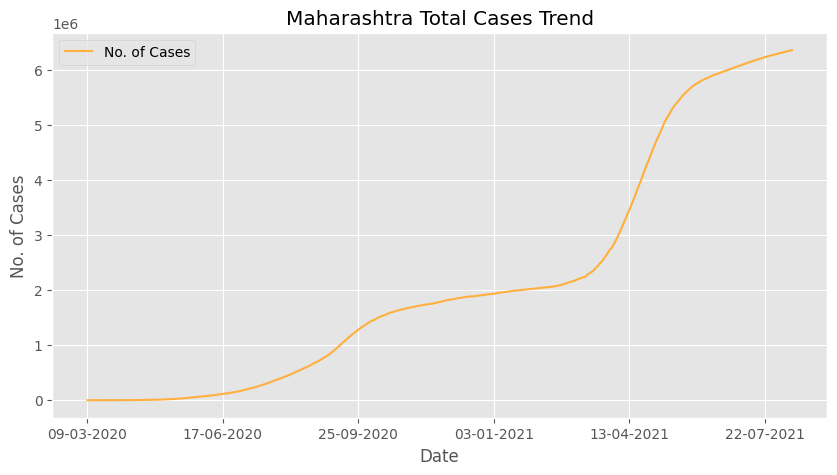

In [33]:
plt.style.use('ggplot')
pd.DataFrame(total_maha_lst,columns=['Date','No. of Cases']).plot(x='Date',y='No. of Cases',title='Maharashtra Total Cases Trend',figsize=(10,5),ylabel='No. of Cases',color='#FFAF3D')

# Kerala vs Karnataka in terms of Total Cases during the month of July 2021

In [34]:
df_kerala=df_india[df_india['State/UnionTerritory']=='Kerala']
data1=df_kerala.values
total_ker_lst=[]
total_ker_cases=0
for i in range(len(data1)):
    if ((data1[i][0])[-7:]=='07-2021'):
        total_ker_lst.append([data1[i][0], data1[i][4]])

df_karnataka=df_india[df_india['State/UnionTerritory']=='Karnataka']
data2=df_karnataka.values
total_kar_lst=[]
total_kar_cases=0
for i in range(len(data2)):
    if ((data2[i][0])[-7:]=='07-2021'):
        total_kar_lst.append([data2[i][0], data2[i][4]])

<AxesSubplot:title={'center':'Kerala vs Karnataka'}, ylabel='No. of Cases'>

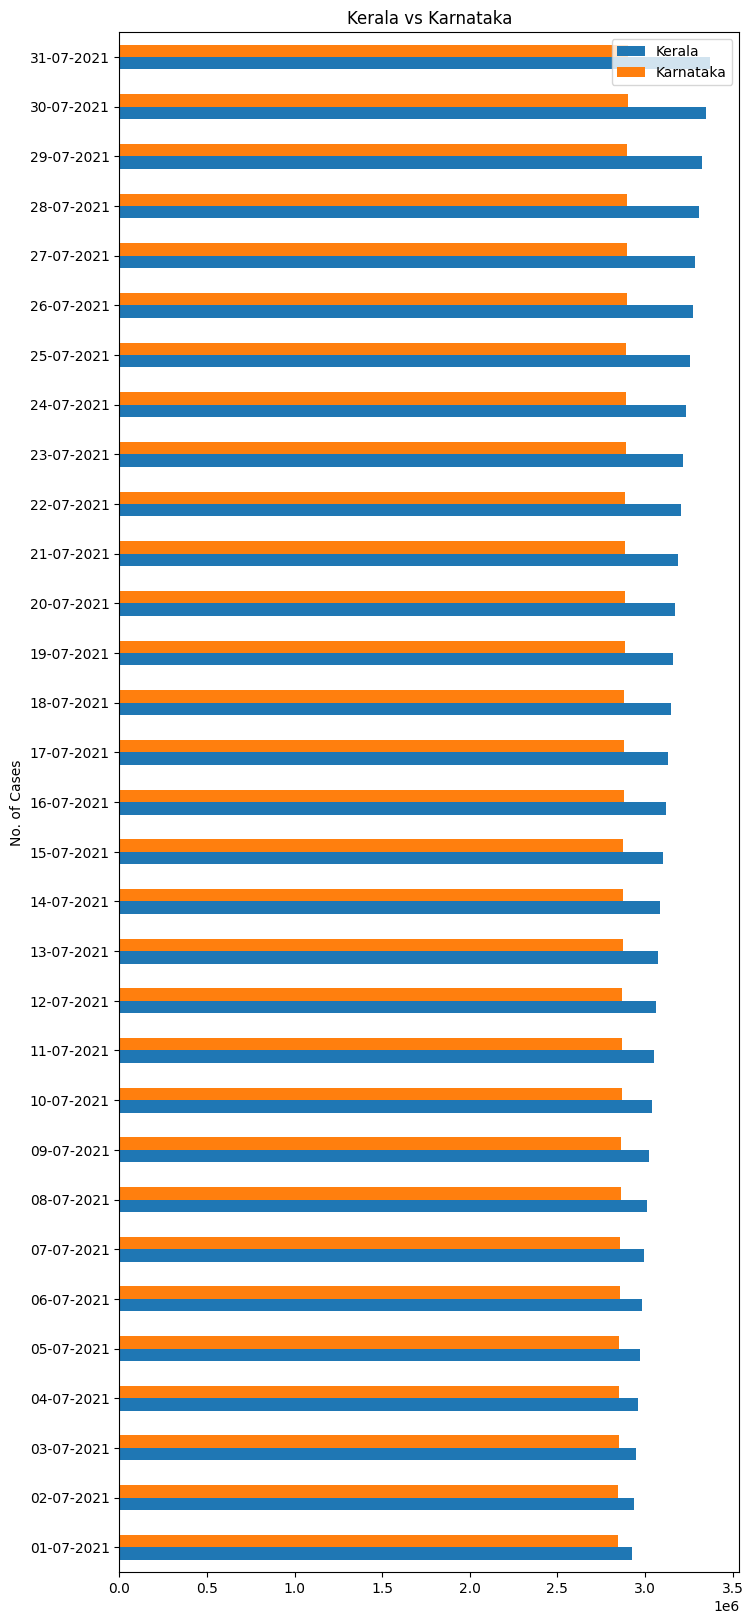

In [35]:
kerala_cases_df=pd.DataFrame(total_ker_lst,columns=['Kerala','Total Cases'])
karnataka_cases_df=pd.DataFrame(total_kar_lst,columns=['Karnataka','Total Cases'])
data = {'Kerala': list(kerala_cases_df['Total Cases']),
        'Karnataka': list(karnataka_cases_df['Total Cases'])
       }
df = pd.DataFrame(data,columns=['Kerala','Karnataka'], index = kerala_cases_df['Kerala'])
plt.style.use('default')
df.plot.barh(figsize=(8,20),ylabel="Date",xlabel="No. of Cases",title="Kerala vs Karnataka")

# Recovered Cases vs Total Cases State-wise

In [36]:
data=df_india.values
recovered_lst=[]
total_lst=[]
for states in df_india['State/UnionTerritory'].unique():
    recovered_cases=0
    total_cases=0
    for i in range(len(data)):
        if(data[i][1]==states):
            recovered_cases=data[i][2]
            total_cases=data[i][4]
    recovered_lst.append([states, recovered_cases])
    total_lst.append([states, total_cases])

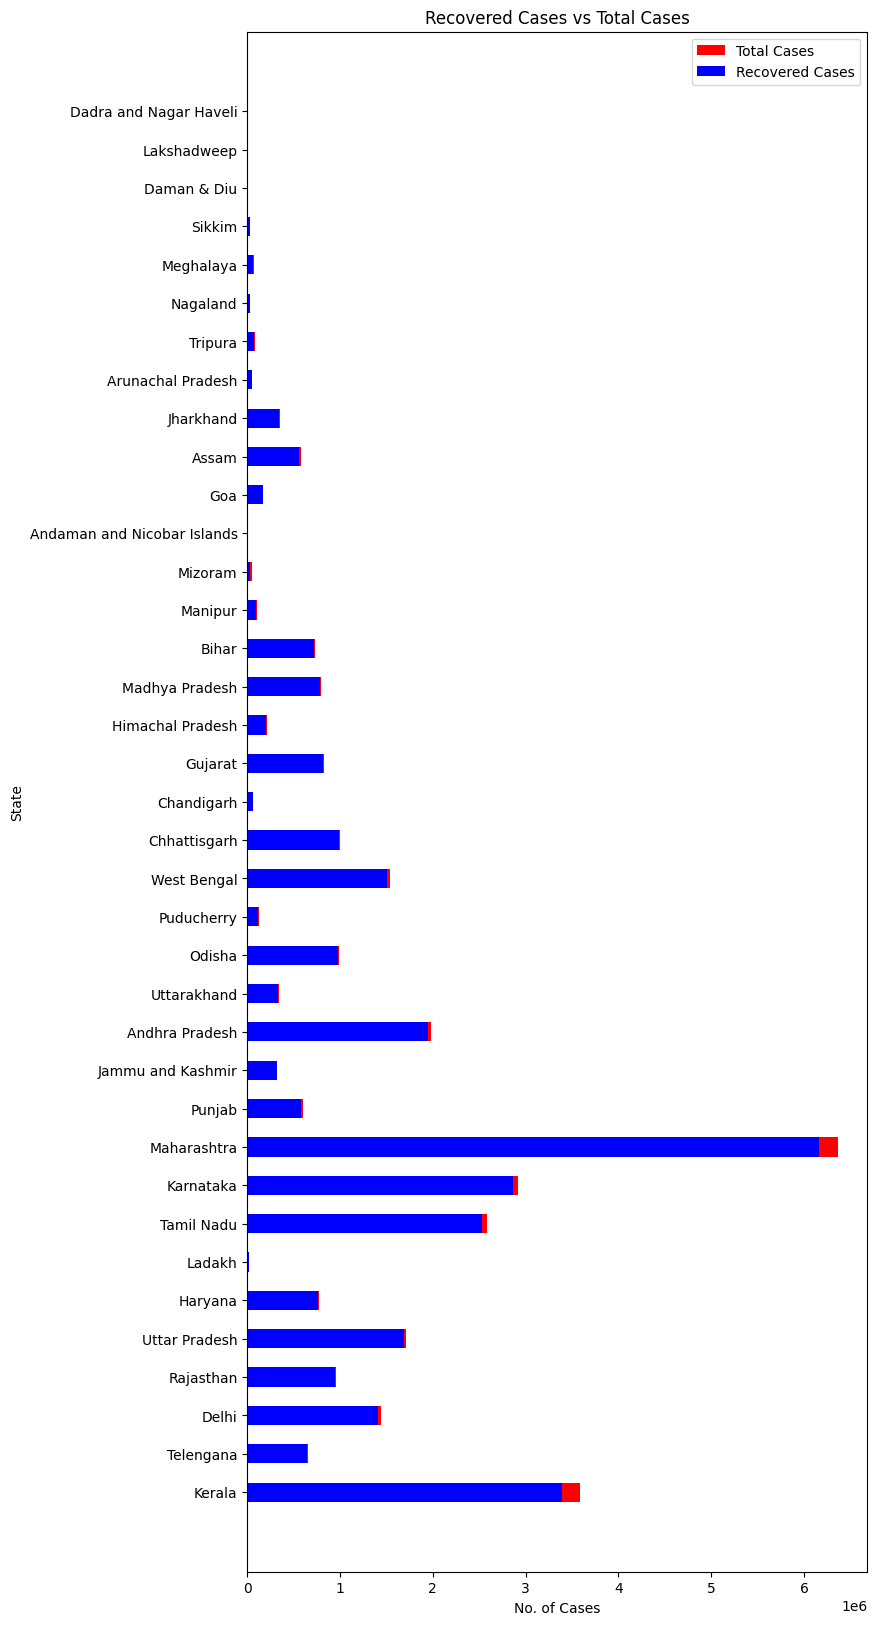

In [37]:
recovered_cases_df=pd.DataFrame(recovered_lst,columns=['State','Recovered Cases'])
total_cases_df=pd.DataFrame(total_lst,columns=['State','Total Cases'])

plt.figure(figsize=(8,20))
plt.barh(total_cases_df['State'],total_cases_df['Total Cases'],label="Total Cases",color='red',height=0.5)
plt.barh(recovered_cases_df['State'],recovered_cases_df['Recovered Cases'],label="Recovered Cases",color='b',height=0.5)
plt.legend()
plt.title("Recovered Cases vs Total Cases")
plt.xlabel("No. of Cases")
plt.ylabel("State")
plt.show()

# Total Number of Confirmed Cases in India

In [38]:
data=df_india.values
total_lst=[]
for states in df_india['State/UnionTerritory'].unique():
    total_cases=0
    for i in range(len(data)):
        if(data[i][1]==states):
            total_cases=data[i][4]
    total_lst.append(total_cases)

total_cases_sum=sum(total_lst)
print("Total Number of Confirmed Cases in India: ",total_cases_sum)

Total Number of Confirmed Cases in India:  32036236


# Percentages of Number of Cured Cases, Active Cases and Deaths in India

In [39]:
data=df_india.values
cured_lst=[]
active_lst=[]
death_lst=[]
for states in df_india['State/UnionTerritory'].unique():
    cured_cases=0
    active_cases=0
    death_cases=0
    for i in range(len(data)):
        if(data[i][1]==states):
            active_cases=data[i][5]
            death_cases=data[i][3]
            cured_cases=data[i][2]
    active_lst.append(active_cases)
    death_lst.append(death_cases)
    cured_lst.append(cured_cases)

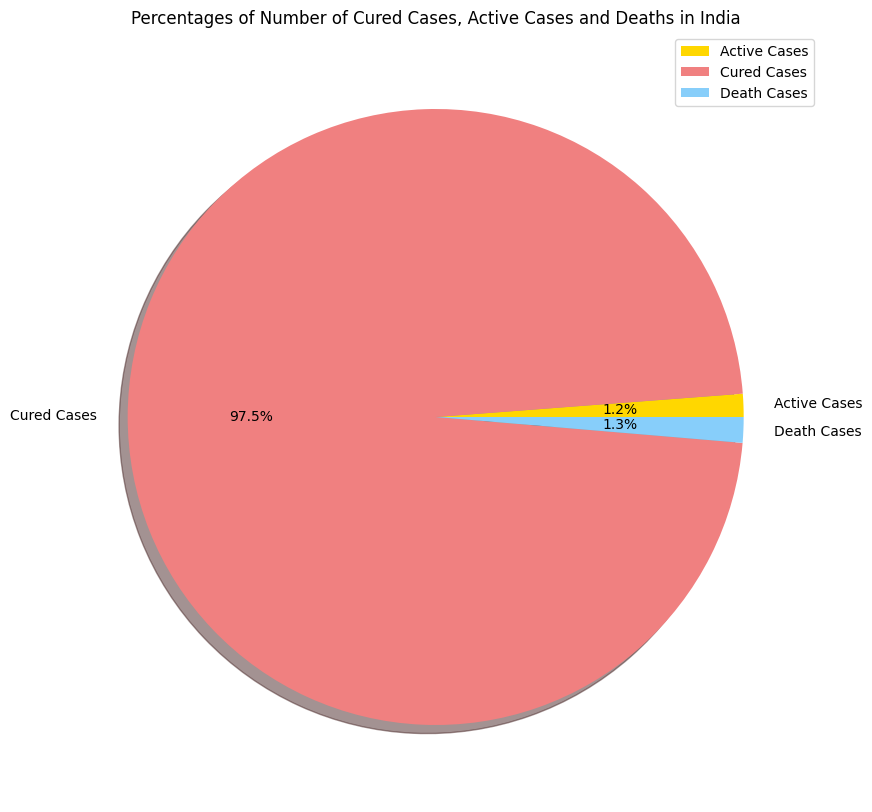

In [40]:
active_cases_sum=sum(active_lst)
cured_cases_sum=sum(cured_lst)
death_cases_sum=sum(death_lst)
plt.figure(figsize=(30,10))
pie_labels=["Active Cases","Cured Cases","Death Cases"]
pie_list=[active_cases_sum,cured_cases_sum,death_cases_sum]
colors = ['gold', 'lightcoral', 'lightskyblue']
plt.pie(pie_list,labels=pie_labels, colors=colors,shadow=True,autopct="%1.1f%%")
plt.legend()
plt.title("Percentages of Number of Cured Cases, Active Cases and Deaths in India")
plt.show()

# No. of Total Cases in Kerala First of Every Month

In [41]:
df_kerala=df_india[df_india['State/UnionTerritory']=='Kerala']
data=df_kerala.values
total_ker_lst=[]
total_ker_cases=0
for i in range(len(data1)):
    if ((data[i][0])[:2]=='01'):
        total_ker_lst.append([data[i][0], data[i][4]])

In [42]:
total_ker_lst

[['01-02-2020', 2],
 ['01-03-2020', 3],
 ['01-04-2020', 241],
 ['01-05-2020', 497],
 ['01-06-2020', 1269],
 ['01-07-2020', 4442],
 ['01-08-2020', 23613],
 ['01-09-2020', 75385],
 ['01-10-2020', 196106],
 ['01-11-2020', 433105],
 ['01-12-2020', 602982],
 ['01-01-2021', 760933],
 ['01-02-2021', 929178],
 ['01-03-2021', 1059403],
 ['01-04-2021', 1124584],
 ['01-05-2021', 1571183],
 ['01-06-2021', 2526579],
 ['01-07-2021', 2924165],
 ['01-08-2021', 3390761]]

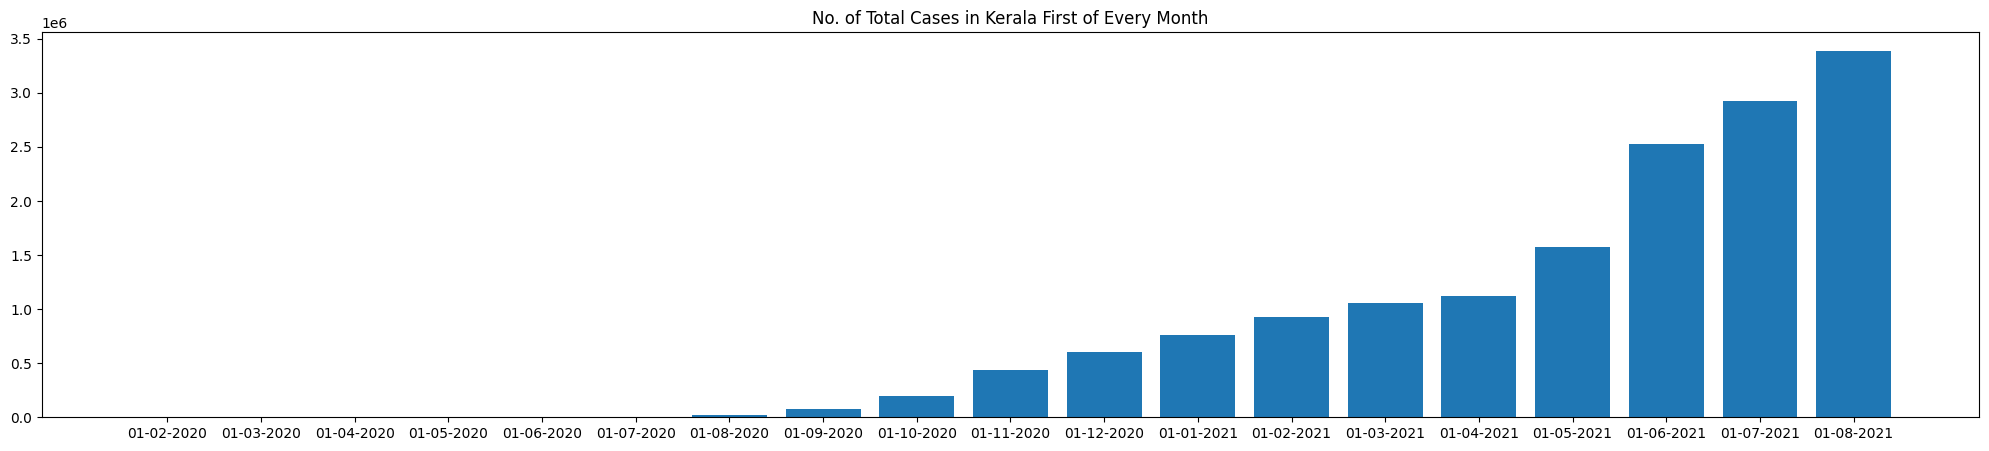

In [43]:
kerala_cases_df=pd.DataFrame(total_ker_lst,columns=['Date','Total Cases'])
plt.figure(figsize=(25,5))
plt.bar(list(kerala_cases_df['Date']),list(kerala_cases_df['Total Cases']))
plt.title("No. of Total Cases in Kerala First of Every Month")
plt.show()

# Maharashtra vs Ladakh in terms of Number of Deaths

In [44]:
df_maharashtra=df_india[df_india['State/UnionTerritory']=='Maharashtra']
data1=df_maharashtra.values
death_maha_lst=[]
dates1=[]
for i in range(len(data1)):
    dates1.append(data1[i][0])
    death_maha_lst.append(data1[i][3]-data1[i-1][3])

df_ladakh=df_india[df_india['State/UnionTerritory']=='Ladakh']
data2=df_ladakh.values
death_ladakh_lst=[]
dates2=[]
for i in range(len(data2)):
    dates2.append(data2[i][0])
    death_ladakh_lst.append(data2[i][3]-data2[i-1][3])

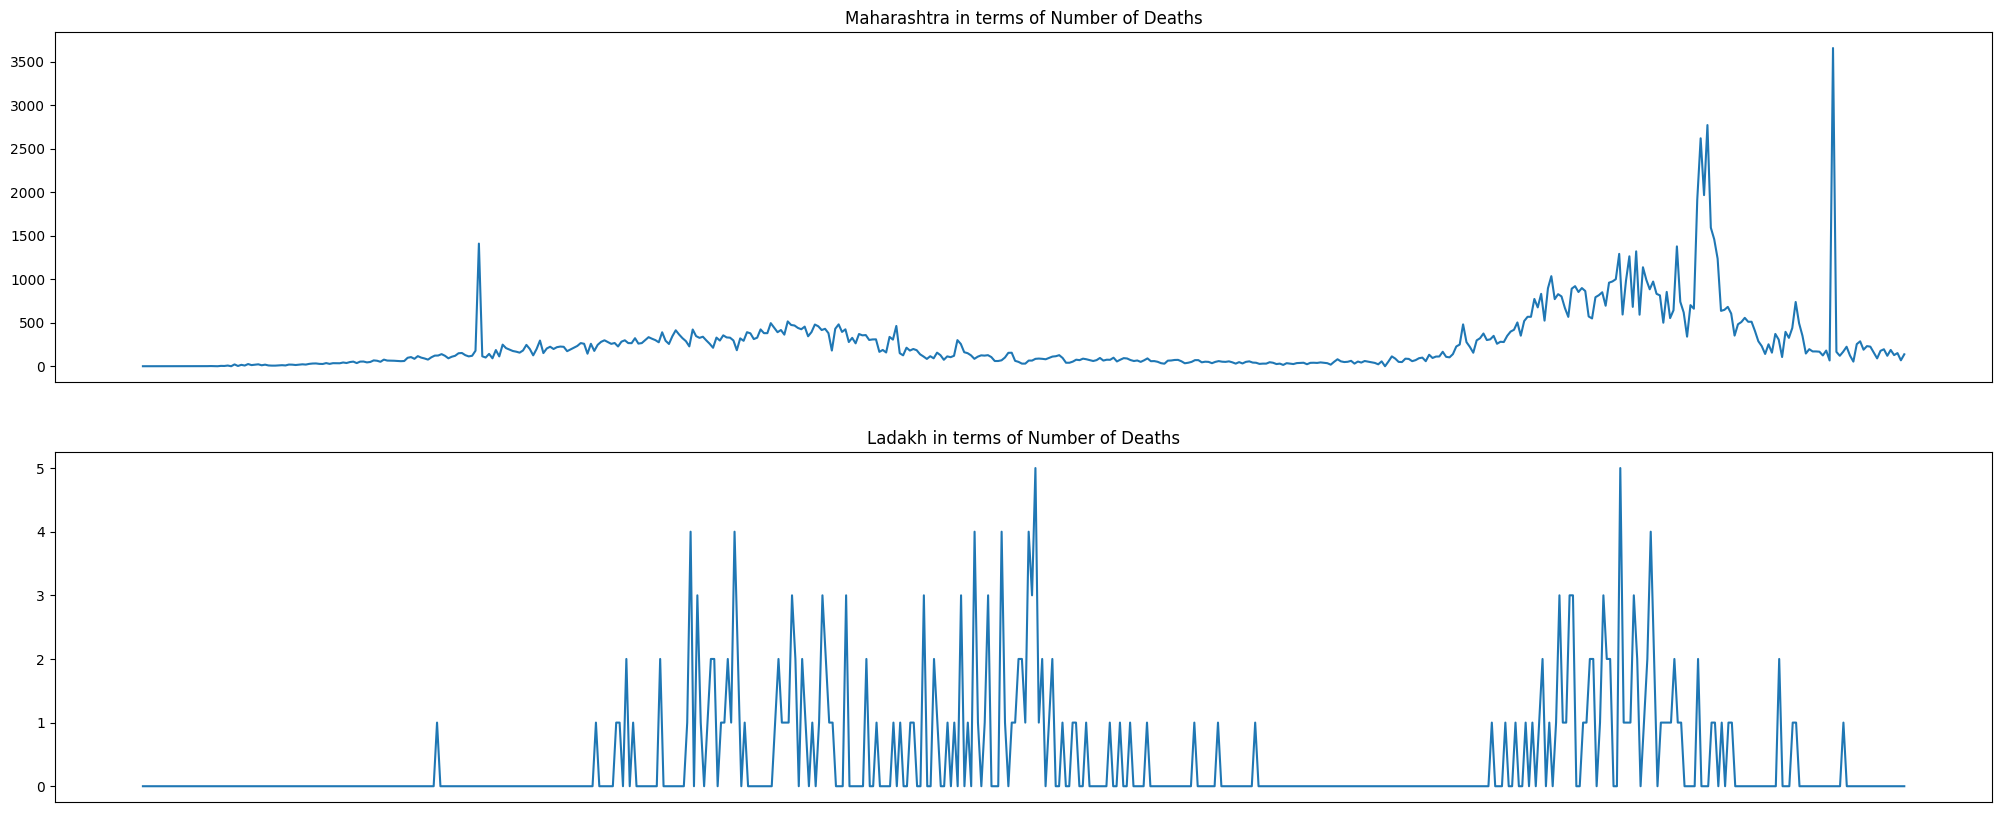

In [45]:
plt.style.use('default')
plt.figure(figsize=(25,10))

plt.subplot(2, 1, 1)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.plot(dates1[1:],death_maha_lst[1:])
plt.title("Maharashtra in terms of Number of Deaths")
plt.subplot(2, 1, 2)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.plot(dates2[1:],death_ladakh_lst[1:])
plt.title("Ladakh in terms of Number of Deaths")
plt.show()